# 1. Input Data

In [245]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [246]:
os.chdir('I:/10_STAFF/YP/HTS')
#df_trip = pd.read_excel('MAG_HTS_2017_v8_beta7.xlsx', sheet_name='Trip')
#df_Person = pd.read_excel('MAG_HTS_2017_v8_beta7.xlsx', sheet_name='Person') 
#df_TAZ= pd.read_excel('TAZ.xls') 
df_trip = pd.read_csv('trip.csv',encoding='latin-1')
df_Person = pd.read_csv('person.csv',encoding='latin-1') 
df_TAZ= pd.read_csv('TAZ.csv') 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [277]:
# new weight
df_weight= pd.read_csv('new_weight.csv') 
df_trip=df_trip.merge(df_weight)
df_trip=df_trip.drop('Weight',axis=1).rename(columns = {'weight':'Weight'})

In [278]:
trip= df_trip[['HHPERSONID','group_source','O_StopID', 'D_StopID', 'Trip_StartTime', 'Trip_EndTime','O_activities1','D_activities1', 'O_taz','D_taz','mode_id','Weight','Trip_Duration_sec']]
age=df_Person[['HHPERSONID','SAGE','AGE']]
TAZ=df_TAZ[['TAZ','MPA_CODE','MPA_NAME']].rename(columns = {'MPA_CODE':'CITY'})

Load lookup tables as needed:

In [279]:
mode_lookup = pd.read_excel('lookup.xlsx', sheet_name='Mode_lookup') 
Activity_lookup = pd.read_excel('lookup.xlsx', sheet_name='Activity_lookup') 
Age_lookup = pd.read_excel('lookup.xlsx', sheet_name='Age_lookup') 
ABM_mode= pd.read_excel('lookup.xlsx', sheet_name='ABM_mode') 
ABM_purpose= pd.read_excel('lookup.xlsx', sheet_name='ABM_purpose') 

In [280]:
#trip.head()

In [281]:
#age.head()

# 2. Data manipulation

In [282]:
tb=trip.merge(age,left_on='HHPERSONID', right_on='HHPERSONID',how='left')
tb1=tb.merge(TAZ,left_on='O_taz', right_on='TAZ',how='left')
tb2=tb1.merge(TAZ,left_on='D_taz', right_on='TAZ',how='left')
tb2 = tb2.drop(['TAZ_x','TAZ_y'], 1)

In [283]:
#tb.describe()

In [284]:
#tb1.head()
#tb1.describe()

In [285]:
#tb2.head()
#tb2.describe()

In [286]:
#tb3= tb2[(tb2.CITY_x == 'Tempe') | (tb2.CITY_y == 'Tempe')]
#Filter city
#tb3= tb2[(tb2.CITY_x == 'TE') | (tb2.CITY_y == 'TE')]
#tb3= tb2[(tb2.CITY_x == 'TE') & (tb2.CITY_y != 'TE')]
#tb3= tb2[(tb2.CITY_x != 'TE') & (tb2.CITY_y == 'TE')]
tb3= tb2[(tb2.CITY_x == 'TE') | (tb2.CITY_y == 'TE')]
#tb3= tb2[(tb2.CITY_x == 'TE') & (tb2.CITY_y == 'TE') & (tb2.O_taz==tb2.D_taz)]
#Merge with lookup tales
tb4=tb3.merge(mode_lookup,left_on='mode_id', right_on='mode_id',how='left')             
tb5=tb4.merge(Age_lookup,left_on='AGE', right_on='Age',how='left')
tb_end=tb5.merge(Activity_lookup,left_on='D_activities1', right_on='Activity_id',how='left')
tb_end.describe()

,HHPERSONID,O_StopID,D_StopID,Trip_StartTime,Trip_EndTime,O_activities1,D_activities1,O_taz,D_taz,mode_id,Weight,Trip_Duration_sec,SAGE,AGE,Age,Activity_id
count,1.331600e+04,1.331600e+04,1.331600e+04,13316.000000,13316.000000,13316.000000,13316.000000,13316.000000,13316.000000,13316.000000,13316.000000,13316.000000,13316.000000,13316.000000,13316.000000,13316.000000
mean,4.568883e+09,4.568883e+11,4.568883e+11,42760.262004,42760.277582,9.276359,9.177756,1850.475068,1848.472965,3.230099,163.609490,1345.941123,30.338690,6.009838,6.009838,9.177756
std,1.360552e+09,1.360552e+11,1.360552e+11,101.876081,101.876453,12.870174,12.703896,823.357067,821.000716,0.971659,215.175883,2303.445381,14.926961,1.729463,1.729463,12.703896
min,3.000073e+08,3.000073e+10,3.000073e+10,42453.499100,42453.531690,-1.000000,-1.000000,0.000000,0.000000,1.000000,15.039821,0.000000,-1.000000,1.000000,1.000000,-1.000000
25%,5.001524e+09,5.001520e+11,5.001520e+11,42766.583615,42766.602935,1.000000,1.000000,1180.000000,1180.000000,3.000000,50.637935,417.000000,20.000000,5.000000,5.000000,1.000000
50%,5.002666e+09,5.002670e+11,5.002670e+11,42783.373750,42783.389515,5.000000,5.000000,1331.000000,1335.000000,3.000000,109.019464,795.000000,27.000000,6.000000,6.000000,5.000000
75%,5.003322e+09,5.003320e+11,5.003320e+11,42829.361170,42829.369233,10.000000,10.000000,2939.000000,2939.000000,3.000000,195.495264,1465.000000,40.000000,7.000000,7.000000,10.000000
max,5.003660e+09,5.003660e+11,5.003660e+11,42858.772220,42858.795140,46.000000,46.000000,3186.000000,3188.000000,9.000000,4431.004124,32100.000000,86.000000,12.000000,12.000000,46.000000


For person based distributions, some more steps are processed as follows:

In [287]:
tb_p= tb_end.groupby(['HHPERSONID','Age','SAGE','Age_category']) \
       .agg({'Weight':'mean'}) \
       .rename(columns={'Weight':'P_Weights'}) \
       .reset_index()
tb_p.head()

,HHPERSONID,Age,SAGE,Age_category,P_Weights
0,300007271,8,49,45 to 54,119.803185
1,300007272,9,-1,55 to 64,119.803185
2,300017601,6,27,25 to 34,86.524339
3,300029821,8,50,45 to 54,53.598969
4,300029823,3,13,13 to 15,53.598969


In [288]:
#export data
# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('out.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
#tb1.to_excel(writer, sheet_name='tb')
#tb1.to_excel(writer, sheet_name='tb1')
#tb2.to_excel(writer, sheet_name='tb2')
# Close the Pandas Excel writer and output the Excel file.
#writer.save()

# 3. Distribution Visualization

## 3.1 Distribution of age of any persons that made trips that originated or ended in Tempe

### originated or ended in Tempe

In [289]:
#Trip Distributions by Age: 
#pd.options.display.float_format = '{:.3f}%'.format
tb_p1= tb_p.groupby(['Age_category','Age']) \
       .agg({'P_Weights':'sum'}) \
       .reset_index()     
tb_p1["Percentage"]=round(tb_p1["P_Weights"]/sum(tb_p1["P_Weights"]),4)
tb_p1.sort_values("Age", inplace=True)
P_age=tb_p1[['Age_category','Percentage','P_Weights']]

#Person Distributions by Age: 
tb_t= tb_end.groupby(['Age_category','Age']) \
       .agg({'Weight':'sum'}) \
       .reset_index()     
tb_t["Percentage"]=round(tb_t["Weight"]/sum(tb_t["Weight"]),4)
tb_t.sort_values("Age", inplace=True)
T_age=tb_t[['Age_category','Percentage','Weight']]

#Merge

Age_dist=P_age.merge(T_age,left_on='Age_category', right_on='Age_category',how='outer') 
Age_dist = Age_dist.rename(columns = {'Percentage_x':'Person_Percent', 'Percentage_y':'Trip_Percent','P_Weights':'Person_Based', 'Weight':'Trip_based'})
Age_dist

,Age_category,Person_Percent,Person_Based,Trip_Percent,Trip_based
0,5 or younger,0.0068,4130.074606,0.0043,9404.269497
1,6 to 12,0.0546,33115.226690,0.0406,88373.605034
2,13 to 15,0.0393,23839.776300,0.0272,59249.397308
3,16 to 17,0.0291,17653.899651,0.0336,73098.775359
4,18 to 24,0.2206,133882.063851,0.2714,591311.615423
5,25 to 34,0.2142,129985.402229,0.2130,464136.577260
6,35 to 44,0.1908,115806.075048,0.1852,403460.745232
7,45 to 54,0.1316,79848.761550,0.1265,275487.403298
8,55 to 64,0.0800,48578.727013,0.0678,147818.161456
9,65 to 74,0.0265,16111.037265,0.0254,55348.232351


In [290]:
#plt.figure(figsize=(14,6))
#plt.bar(T_age['Age_category'], T_age['Percentage'], align='center', alpha=0.5)
#plt.title("Distribution of Trips by Age: Tempe", fontsize=16)
#plt.xlabel('Age', fontsize=12)
       
#T_age.plot.bar(x='Age_category',color='skyblue')
#P_age.plot.bar(x='Age_category',color='skyblue')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Age')

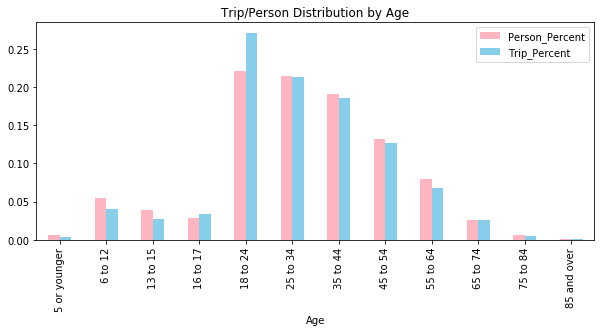

In [291]:
ax=Age_dist.plot(x="Age_category", y=["Person_Percent", "Trip_Percent"], kind="bar",color=['lightpink','skyblue'], title='Trip/Person Distribution by Age', figsize=(10,4))
ax.set_xlabel('Age')

Text(0.5,0,'Age')

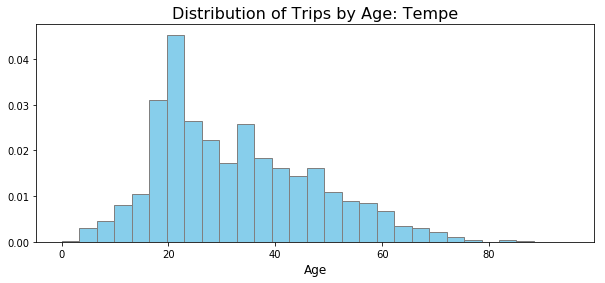

In [292]:
plt.figure(figsize=(10,4))
bin=np.linspace(0,95,30)
plt.hist(tb_end['SAGE'], weights=tb_end['Weight']/sum(tb_end['Weight']), bins=bin, color='skyblue',edgecolor='grey',normed=True)
plt.title("Distribution of Trips by Age: Tempe", fontsize=16)
plt.xlabel('Age', fontsize=12)

In [293]:
#plt.figure(figsize=(12,4))
#plt.hist(tb_end['Age_category'], weights=tb_end['Weight']/sum(tb_end['Weight']), bins=15, color='skyblue',edgecolor='black',rwidth=0.8)
#plt.title("Distribution of Trips by Age: Tempe", fontsize=16)
#plt.xlabel('Age', fontsize=12)
#plt.xticks(rotation=90)

## 3.2 Distribution of Trip Purpose for trips that originated/ ended in Tempe

In [294]:
## Trip Purpose for trips originated/ended in Tempe
tb_p= tb_end.groupby(['Activity_type','D_activities1']) \
       .agg({'Weight':'sum'}) \
       .reset_index()     
tb_p["Percentage"]=round(tb_p["Weight"]/sum(tb_p["Weight"]),4)
tb_p.sort_values("D_activities1", inplace=True)
Purpose_dist=tb_p[['Activity_type','Percentage','Weight']]
Purpose_dist = Purpose_dist.rename(columns = {'Activity_type':'Purpose', 'Percentage':'Percent','Weight':'Trips'})
Purpose_dist

,Purpose,Percent,Trips
20,empty response,0.0006,1342.438094
10,Primary Home,0.2305,502265.790611
18,Work,0.1600,348633.894347
19,Work Related,0.0591,128792.367059
14,Shopping,0.0708,154250.410446
9,Personal Errands/Tasks,0.0555,120985.484283
2,Dropoff/Pickup/Accompany Someone,0.0543,118233.815707
1,Change Travel Mode/Transfer,0.0878,191308.810940
5,Health Care,0.0108,23484.810687
3,Eat Meals Out,0.0714,155475.245304


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


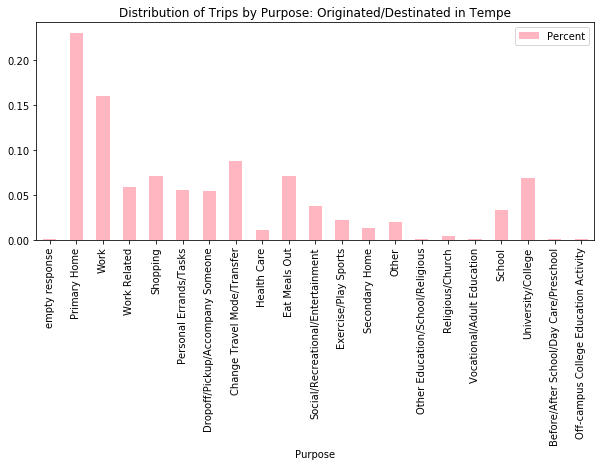

In [295]:
ax=Purpose_dist.plot(x="Purpose", y=['Percent'], kind="bar",color=['lightpink'], title='Distribution of Trips by Purpose: Originated/Destinated in Tempe', figsize=(10,4))

In [296]:
#plt.figure(figsize=(10,4))
#plt.hist(tb_end['Activity_type_y'], weights=tb_end['Weight']/sum(tb_end['Weight']), bins=15, color='skyblue',edgecolor='black')
#plt.title("Distribution of Trips by Purpose:Originated in Tempe", fontsize=16)
#plt.xlabel('Purpose',fontsize=12 )
#plt.xticks(rotation=90)

## 3.3 Distribution of Mode Share for trips that originated or ended in Tempe

In [297]:
## Trip mode for trips originated/ended in Tempe
tb_p= tb_end.groupby(['mode']) \
       .agg({'Weight':'sum'}) \
       .reset_index()     
tb_p["Percent"]=round(tb_p["Weight"]/sum(tb_p["Weight"]),5)
#tb_p.sort_values("D_activities1", inplace=True)
mode_dist=tb_p[['mode','Percent','Weight']]
mode_dist = mode_dist.rename(columns = {'mode':'Mode','Weight':'Trips'})
mode_dist

,Mode,Percent,Trips
0,Bicycle,0.02715,5.915953e+04
1,Bus,0.02807,6.114975e+04
2,Default,0.00182,3.958038e+03
3,Foot,0.17955,3.911657e+05
4,Light Rail,0.00904,1.969186e+04
5,Other,0.00534,1.162536e+04
6,Taxi/Car Service,0.00144,3.143004e+03
7,Vehicle,0.74760,1.628731e+06


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


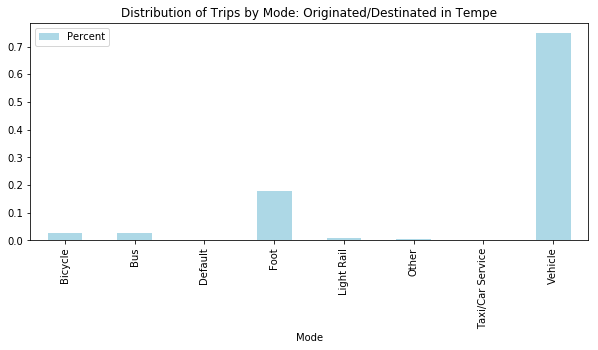

In [298]:
ax=mode_dist.plot(x="Mode", y=['Percent'], kind="bar",color=['lightblue'], title='Distribution of Trips by Mode: Originated/Destinated in Tempe', figsize=(10,4))

In [299]:
#plt.figure(figsize=(10,4))
#plt.hist(tb_end['mode'], weights=tb_end['Weight']/sum(tb_end['Weight']), bins=10, color='skyblue',edgecolor='black')
#plt.title("Distribution of Trips by Mode: Tempe", fontsize=16)
#plt.xlabel(' Mode',fontsize=12 )

## 3.4 Spatial Distribution of Origin and Destination (at TAZ level) of trips that originated or ended in Tempe

Text(0.5,0,'TAZ')

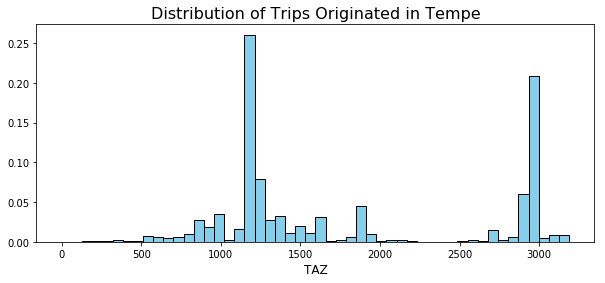

In [300]:
tb_O= tb_end[(tb_end.CITY_x == 'TE')]
plt.figure(figsize=(10,4))
plt.hist(tb_O['D_taz'], weights=tb_O['Weight']/sum(tb_O['Weight']), bins=50, color='skyblue',edgecolor='black')
plt.title("Distribution of Trips Originated in Tempe", fontsize=16)
plt.xlabel('TAZ',fontsize=12 )

Text(0.5,0,'TAZ')

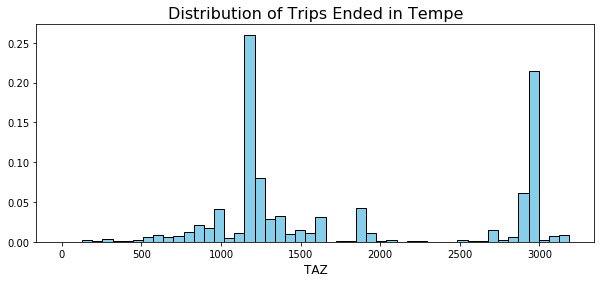

In [301]:
tb_D= tb_end[(tb_end.CITY_y == 'TE')]
plt.figure(figsize=(10,4))
plt.hist(tb_D['O_taz'], weights=tb_D['Weight']/sum(tb_D['Weight']), bins=50, color='skyblue',edgecolor='black')
plt.title("Distribution of Trips Ended in Tempe", fontsize=16)
plt.xlabel('TAZ',fontsize=12 )

In [302]:
'''## Origion from Tempe
tb_tazO= tb_end[(tb_end.CITY_x == 'TE')]\
       .groupby(['D_taz',]) \
       .agg({'Weight':'sum'}) \
       .reset_index()
tb_tazO= tb_tazO.rename(columns = {'D_taz':'TAZ','Weight':'Trips'})
tb_tazO.head()

## Ended in Tempe
tb_tazD= tb_end[(tb_end.CITY_y == 'TE')]\
       .groupby(['O_taz']) \
       .agg({'Weight':'sum'}) \
       .reset_index()  
tb_tazD = tb_tazD.rename(columns = {'O_taz':'TAZ','Weight':'Trips'})   
tb_tazD.head()

#Merge
 
TAZ_trip=pd.merge(tb_tazO, tb_tazD, on='TAZ', how='outer')
TAZ_trip = TAZ_trip.rename(columns = {'Trips_x':'From_Tempe', 'Trips_y':'To_Tempe'})
TAZ_trip=pd.merge(TAZ_trip, TAZ, on='TAZ', how='left')
TAZ_trip['Trips']=TAZ_trip[["From_Tempe", "To_Tempe"]].sum(axis=1).where(TAZ_trip['CITY'] !='TE', TAZ_trip['From_Tempe'])
TAZ_trip.head()'''

'## Origion from Tempe\ntb_tazO= tb_end[(tb_end.CITY_x == \'TE\')]       .groupby([\'D_taz\',])        .agg({\'Weight\':\'sum\'})        .reset_index()\ntb_tazO= tb_tazO.rename(columns = {\'D_taz\':\'TAZ\',\'Weight\':\'Trips\'})\ntb_tazO.head()\n\n## Ended in Tempe\ntb_tazD= tb_end[(tb_end.CITY_y == \'TE\')]       .groupby([\'O_taz\'])        .agg({\'Weight\':\'sum\'})        .reset_index()  \ntb_tazD = tb_tazD.rename(columns = {\'O_taz\':\'TAZ\',\'Weight\':\'Trips\'})   \ntb_tazD.head()\n\n#Merge\n \nTAZ_trip=pd.merge(tb_tazO, tb_tazD, on=\'TAZ\', how=\'outer\')\nTAZ_trip = TAZ_trip.rename(columns = {\'Trips_x\':\'From_Tempe\', \'Trips_y\':\'To_Tempe\'})\nTAZ_trip=pd.merge(TAZ_trip, TAZ, on=\'TAZ\', how=\'left\')\nTAZ_trip[\'Trips\']=TAZ_trip[["From_Tempe", "To_Tempe"]].sum(axis=1).where(TAZ_trip[\'CITY\'] !=\'TE\', TAZ_trip[\'From_Tempe\'])\nTAZ_trip.head()'

In [303]:
tb_end.head()

,HHPERSONID,group_source,O_StopID,D_StopID,Trip_StartTime,Trip_EndTime,O_activities1,D_activities1,O_taz,D_taz,...,CITY_x,MPA_NAME_x,CITY_y,MPA_NAME_y,mode,Age,Age_category,Activity_id,Activity_type,Activity_plot
0,300007271,spring,3.000073e+10,3.000073e+10,42460.67766,42460.72133,2,7,948,1168,...,PH,Phoenix,TE,Tempe,Vehicle,8,45 to 54,7,Dropoff/Pickup/Accompany Someone,Dropoff/Pickup/Accompany Someone
1,300007271,spring,3.000073e+10,3.000073e+10,42460.72233,42460.72726,7,11,1168,3186,...,TE,Tempe,TE,Tempe,Foot,8,45 to 54,11,Social/Recreational/Entertainment,Social/Recreational/Entertainment
2,300007271,spring,3.000073e+10,3.000073e+10,42460.78970,42460.79297,11,8,3186,1168,...,TE,Tempe,TE,Tempe,Foot,8,45 to 54,8,Change Travel Mode/Transfer,Other
3,300007271,spring,3.000073e+10,3.000073e+10,42460.79483,42460.79729,8,11,1168,1168,...,TE,Tempe,TE,Tempe,Vehicle,8,45 to 54,11,Social/Recreational/Entertainment,Social/Recreational/Entertainment
4,300007271,spring,3.000073e+10,3.000073e+10,42460.79800,42460.82660,11,1,1168,449,...,TE,Tempe,GL,Glendale,Vehicle,8,45 to 54,1,Primary Home,Home


In [304]:
## Origion from Tempe

tb_tazO= tb_end[(tb_end.CITY_x == 'TE')]\
       .groupby(['D_taz',]) \
       .agg({'Weight':'sum'}) \
       .reset_index()
tb_tazO= tb_tazO.rename(columns = {'D_taz':'TAZ','Weight':'Trips'})
tb_tazO.head()

## Ended in Tempe
tb_tazD= tb_end[(tb_end.CITY_y == 'TE')]\
       .groupby(['O_taz']) \
       .agg({'Weight':'sum'}) \
       .reset_index()  
tb_tazD = tb_tazD.rename(columns = {'O_taz':'TAZ','Weight':'Trips'})   
tb_tazD.head()

##same taz
tb_same_taz=tb_end[(tb_end.O_taz== tb_end.D_taz)]\
     .groupby(['O_taz',])\
     .agg({'Weight':'sum'})\
    .reset_index() 
        
tb_same_taz=tb_same_taz.rename(columns={"O_taz": "TAZ"})

        

#Merge
 
TAZ_trip=pd.merge(tb_tazO, tb_tazD, on='TAZ', how='outer')
TAZ_trip = TAZ_trip.rename(columns = {'Trips_x':'To_Tempe', 'Trips_y':'From_Tempe'})
TAZ_trip=pd.merge(TAZ_trip, TAZ, on='TAZ', how='left')
TAZ_trip=pd.merge(TAZ_trip,tb_same_taz, on='TAZ', how='left')

TAZ_trip.fillna(0, inplace=True)
TAZ_trip['Trips']=TAZ_trip["From_Tempe"]+ TAZ_trip["To_Tempe"]-TAZ_trip['Weight']
TAZ_trip.head()




,TAZ,To_Tempe,From_Tempe,CITY,MPA_NAME,Weight,Trips
0,0,382.775547,437.224817,0,0,0.0,820.000364
1,119,338.528735,338.528735,BU,Buckeye,0.0,677.057470
2,130,496.593821,0.000000,BU,Buckeye,0.0,496.593821
3,143,370.785298,362.483604,PH,Phoenix,0.0,733.268902
4,176,88.824160,0.000000,SU,Surprise,0.0,88.824160


In [305]:
TAZ_trip

,TAZ,To_Tempe,From_Tempe,CITY,MPA_NAME,Weight,Trips
0,0,382.775547,437.224817,0,0,0.0,820.000364
1,119,338.528735,338.528735,BU,Buckeye,0.0,677.057470
2,130,496.593821,0.000000,BU,Buckeye,0.0,496.593821
3,143,370.785298,362.483604,PH,Phoenix,0.0,733.268902
4,176,88.824160,0.000000,SU,Surprise,0.0,88.824160
5,190,70.126418,70.126418,SU,Surprise,0.0,140.252835
6,206,692.546310,692.546310,GO,Goodyear,0.0,1385.092620
7,211,815.788712,0.000000,GO,Goodyear,0.0,815.788712
8,224,91.811027,0.000000,GO,Goodyear,0.0,91.811027
9,225,266.494732,35.434179,GO,Goodyear,0.0,301.928911


In [306]:
TAZ_trip.describe()

,TAZ,To_Tempe,From_Tempe,Weight,Trips
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,1442.490157,1583.633282,1568.438255,194.168267,2957.903270
std,756.648071,6803.465048,6952.679780,2311.739788,11618.164404
min,0.000000,0.000000,0.000000,0.000000,15.039821
25%,899.750000,112.075954,101.499098,0.000000,298.255650
50%,1265.500000,382.412157,361.060699,0.000000,772.842442
75%,1760.250000,1095.529478,1105.302942,0.000000,2121.949332
max,3188.000000,174215.659395,179299.868291,69988.574650,283526.953035


In [307]:
##output for ArcGIS
#TAZ_trip.to_csv('TAZ_trip2.csv')

# 3.5 Trip Time

Text(0.5,0,'Trip_Time(min)')

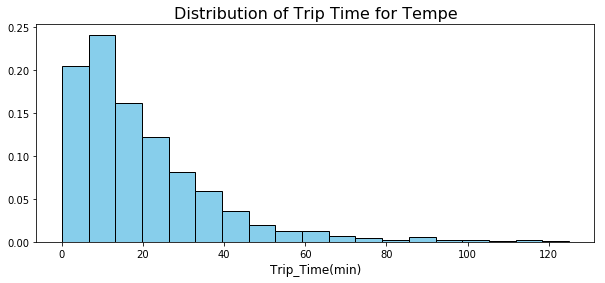

In [308]:
#trip time distribution 
tb_end['Trip_Duration_min']=tb_end['Trip_Duration_sec']/60
plt.figure(figsize=(10,4))
bin=np.linspace(0,125,20)
plt.hist(tb_end['Trip_Duration_min'], weights=tb_end['Weight']/sum(tb_end['Weight']), bins=bin, color='skyblue',edgecolor='black')
plt.title("Distribution of Trip Time for Tempe", fontsize=16)
plt.xlabel('Trip_Time(min)',fontsize=12 )

In [309]:
##average trip time for (TAZ level) of trips

In [310]:
## Origion from Tempe
tb_end['trip_time']=tb_end['Trip_Duration_min']*tb_end['Weight']
tb_tazO= tb_end[(tb_end.CITY_x == 'TE')]\
       .groupby(['D_taz']) \
       .agg({'trip_time':'sum','Weight':'sum'}) \
       .reset_index()
tb_tazO['ave_time']=tb_tazO['trip_time']/tb_tazO['Weight']
tb_tazO=tb_tazO[['D_taz','ave_time']]
O_Taz_time_w = tb_tazO.rename(columns = {'D_taz':'TAZ','ave_time':'Time'})
O_Taz_time_w.head()

,TAZ,Time
0,0,94.295051
1,119,77.600000
2,130,58.783333
3,143,60.883333
4,176,70.866667


In [311]:
## Ended in Tempe
tb_tazD= tb_end[(tb_end.CITY_y == 'TE')]\
       .groupby(['O_taz']) \
       .agg({'trip_time':'sum','Weight':'sum'}) \
       .reset_index()
tb_tazD['ave_time']=tb_tazD['trip_time']/tb_tazD['Weight']
tb_tazD=tb_tazD[['O_taz','ave_time']]
D_Taz_time_w = tb_tazD.rename(columns = {'O_taz':'TAZ','ave_time':'Time'})
D_Taz_time_w.head()

,TAZ,Time
0,0,127.719576
1,119,47.666667
2,143,30.921757
3,173,43.633333
4,178,49.183333


In [312]:
#Merge
TAZ_time_w=pd.merge(O_Taz_time_w, D_Taz_time_w, on='TAZ', how='outer')
TAZ_time_w= TAZ_time_w.rename(columns = {'Time_x':'From_Tempe', 'Time_y':'To_Tempe'}) 
TAZ_time_w.head()

,TAZ,From_Tempe,To_Tempe
0,0,94.295051,127.719576
1,119,77.600000,47.666667
2,130,58.783333,NaN
3,143,60.883333,30.921757
4,176,70.866667,NaN


## Average trip time for (TAZ level) of trips (Do not consider weight)

In [313]:
## Origion from Tempe
tb_tazO= tb_end[(tb_end.CITY_x == 'TE')]\
       .groupby(['D_taz']) \
       .agg({'Trip_Duration_min':'mean'}) \
       .reset_index()
tb_tazO=tb_tazO[['D_taz','Trip_Duration_min']]
O_Taz_time = tb_tazO.rename(columns = {'D_taz':'TAZ','Trip_Duration_min':'Time'})
O_Taz_time.head()

,TAZ,Time
0,0,95.057143
1,119,77.600000
2,130,58.783333
3,143,60.883333
4,176,70.866667


In [314]:
## Ended in Tempe
tb_tazD= tb_end[(tb_end.CITY_y == 'TE')]\
       .groupby(['O_taz']) \
       .agg({'Trip_Duration_min':'mean'}) \
       .reset_index()
tb_tazD=tb_tazD[['O_taz','Trip_Duration_min']]
D_Taz_time= tb_tazD.rename(columns = {'O_taz':'TAZ','Trip_Duration_min':'Time'})
D_Taz_time.head()

,TAZ,Time
0,0,123.497222
1,119,47.666667
2,143,30.900000
3,173,43.633333
4,178,49.183333


In [315]:
#Merge
TAZ_time=pd.merge(O_Taz_time, D_Taz_time, on='TAZ', how='outer')
TAZ_time= TAZ_time.rename(columns = {'Time_x':'From_Tempe', 'Time_y':'To_Tempe'}) 
TAZ_time.head()

,TAZ,From_Tempe,To_Tempe
0,0,95.057143,123.497222
1,119,77.600000,47.666667
2,130,58.783333,NaN
3,143,60.883333,30.900000
4,176,70.866667,NaN


## Compare the trip time by mode

In [316]:
## Origion from Tempe
tb_tazO_Mode= tb_end[(tb_end.CITY_x == 'TE')]\
       .groupby(['D_taz','mode']) \
       .agg({'Trip_Duration_min':'mean'}) \
       .reset_index()
tb_tazO_Mode=tb_tazO_Mode[['D_taz','mode','Trip_Duration_min']]
O_Taz_time_Mode = tb_tazO_Mode.rename(columns = {'D_taz':'TAZ','Trip_Duration_min':'Time'})
O_Taz_time_Mode.head()

,TAZ,mode,Time
0,0,Vehicle,95.057143
1,119,Vehicle,77.600000
2,130,Vehicle,58.783333
3,143,Light Rail,85.033333
4,143,Vehicle,36.733333


Text(0.5,0,'TAZ')

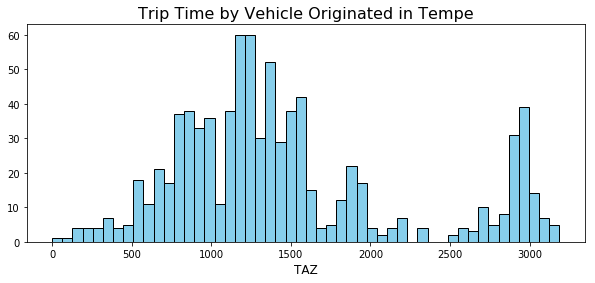

In [317]:
df=O_Taz_time_Mode
df=df[( df['mode'] == 'Vehicle')]
plt.figure(figsize=(10,4))
plt.hist(df['TAZ'], bins=50, color='skyblue',edgecolor='black')
plt.title("Trip Time by Vehicle Originated in Tempe", fontsize=16)
plt.xlabel('TAZ',fontsize=12 )


Text(0.5,0,'TAZ')

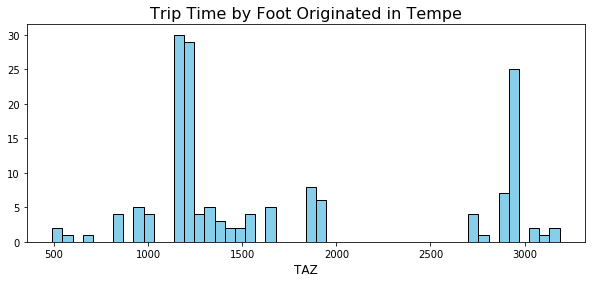

In [318]:
df=O_Taz_time_Mode
df=df[( df['mode'] == 'Foot')]
plt.figure(figsize=(10,4))
plt.hist(df['TAZ'], bins=50, color='skyblue',edgecolor='black')
plt.title("Trip Time by Foot Originated in Tempe", fontsize=16)
plt.xlabel('TAZ',fontsize=12 )

# 4. Output Data to excel

In [319]:
#export data
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('HTS_Tempe_NEW.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
Age_dist.to_excel(writer, sheet_name='Dist by Age')
Purpose_dist.to_excel(writer, sheet_name='Dist by Purpose')
mode_dist.to_excel(writer, sheet_name='Dist by Mode')
TAZ_trip.to_excel(writer, sheet_name='TAZ_trips')
#TAZ_time.to_excel(writer, sheet_name='TAZ_times')
#TAZ_time_w.to_excel(writer, sheet_name='TAZ_times_consider weights')
#Close the Pandas Excel writer and output the Excel file.
writer.save()

# Clean Trip_Duration_sec

In [9]:
df_trip[df_trip.Trip_Duration_sec>=(8*3600)]

,HHID,HHPERSONID,group_source,HHMEMBER_NAME,O_StopID,D_StopID,Trip_StartTime,Trip_EndTime,O_taz,O_maz,...,O_psgrActivities12,D_psgrActivities12,O_psgrActivities13,D_psgrActivities13,O_psgrActivities14,D_psgrActivities14,O_RawStopID,D_RawStopID,Weight,Trip_Duration_sec
3049,30030044,300300441,spring,Donald,3.003004e+10,3.003004e+10,42486.33990,42486.69309,955,5175,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.625327e+06,3.653041e+06,134.078919,30516
4995,30050958,300509581,spring,Kasandra,3.005096e+10,3.005096e+10,42509.58333,42509.91667,1084,13233,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.920646e+06,4.920866e+06,231.520433,28800
4996,30050958,300509582,spring,Nick,3.005096e+10,3.005096e+10,42509.58333,42509.93750,1084,13233,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.920459e+06,4.920547e+06,231.520433,30600
5727,30060374,300603743,spring,Angela,3.006037e+10,3.006037e+10,42500.40480,42500.74547,2723,23877,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.427393e+06,4.427399e+06,415.646090,29434
10776,50001706,5000170601,fall,Kyle,5.000170e+11,5.000170e+11,42605.38235,42605.72133,930,10937,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.503006e+06,6.503946e+06,109.330125,29288
11286,50002156,5000215601,fall,Anita,5.000220e+11,5.000220e+11,42604.23958,42604.60971,1378,15883,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.505160e+06,6.475260e+06,76.626866,31979
12250,50002885,5000288502,fall,Julie,5.000290e+11,5.000290e+11,42615.04022,42615.38762,1007,12755,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.863361e+06,6.891853e+06,316.483164,30015
13542,50003772,5000377201,fall,Stefanie,5.000380e+11,5.000380e+11,42625.37847,42625.71449,2917,21486,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.408161e+06,7.398532e+06,509.909881,29032
14523,50004722,5000472201,fall,Marcos,5.000470e+11,5.000470e+11,42625.26250,42625.62500,871,10200,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.367602e+06,7.404430e+06,165.165370,31320
15445,50005402,5000540204,child2,JMP,5.000540e+11,5.000540e+11,42628.34583,42628.68403,521,5921,...,NaN,NaN,NaN,NaN,NaN,NaN,5.000540e+11,5.000540e+11,144.421947,29220


# Compare with ABM model

In [59]:
df_abm= pd.read_csv('2017_abm_trip_w_per.csv') 

In [60]:
df_abm.head()

,hhid,pnum,HHPERSONID,origTaz,origMaz,destTaz,destMaz,origPurp,destPurp,mode,...,gender,industry,schlGrade,educLevel,workPlaceType,workPlaceTaz,workPlaceMaz,schoolType,schoolTaz,schoolMaz
0,0,1,1,101,1,101,3,0,72,1,...,2,0,0,14,0,0,0,0,0,0
1,0,1,1,101,3,101,1,72,0,1,...,2,0,0,14,0,0,0,0,0,0
2,0,2,2,101,1,214,1217,0,15,1,...,1,55,0,13,2,1860,19947,0,0,0
3,0,2,2,214,1217,101,1,15,0,1,...,1,55,0,13,2,1860,19947,0,0,0
4,2,1,201,101,1,2776,24224,0,1,1,...,2,62,0,11,2,2776,24224,0,0,0


In [61]:
df_abm.dtypes

hhid                  int64
pnum                  int64
HHPERSONID            int64
origTaz               int64
origMaz               int64
destTaz               int64
destMaz               int64
origPurp              int64
destPurp              int64
mode                  int64
OCity                object
DCity                object
pumsSerialNo        float64
persType              int64
persTypeDetailed      int64
age                   int64
gender                int64
industry              int64
schlGrade             int64
educLevel             int64
workPlaceType         int64
workPlaceTaz          int64
workPlaceMaz          int64
schoolType            int64
schoolTaz             int64
schoolMaz             int64
dtype: object

In [62]:
df_abm['HH-PERSONID']=df_abm['hhid'].astype(str) + '_'+df_abm['HHPERSONID'].astype(str)

In [63]:
df_abm['persType'].head()

0    5
1    5
2    2
3    2
4    1
Name: persType, dtype: int64

In [64]:
df_abm['destPurp'].unique()

array([ 72,   0,  15,   1,   5,   6,  42, 412,   3, 411,   9,  73,  71,
         7,   8,   2], dtype=int64)

In [65]:
df_abm=df_abm.merge(ABM_mode).merge(ABM_purpose)

In [66]:
df_abm['age_sort'] = 12
df_abm.loc[df_abm['age']<=84, 'age_sort'] = 11
df_abm.loc[df_abm['age']<=74, 'age_sort'] = 10
df_abm.loc[df_abm['age']<=64, 'age_sort'] = 9
df_abm.loc[df_abm['age']<=54, 'age_sort'] = 8
df_abm.loc[df_abm['age']<=44, 'age_sort'] = 7
df_abm.loc[df_abm['age']<=34, 'age_sort'] = 6
df_abm.loc[df_abm['age']<=24, 'age_sort'] = 5
df_abm.loc[df_abm['age']<=17, 'age_sort'] = 4
df_abm.loc[df_abm['age']<=15, 'age_sort'] = 3
df_abm.loc[df_abm['age']<=12, 'age_sort'] = 2
df_abm.loc[df_abm['age']<=5, 'age_sort'] = 1

df_abm['age_category'] = '85 and over'
df_abm.loc[df_abm['age']<=84, 'age_category'] = '75 to 84'
df_abm.loc[df_abm['age']<=74, 'age_category'] =' 65 to 74'
df_abm.loc[df_abm['age']<=64, 'age_category'] = '55 to 64'
df_abm.loc[df_abm['age']<=54, 'age_category'] = '45 to 54'
df_abm.loc[df_abm['age']<=44, 'age_category'] = '35 to 44'
df_abm.loc[df_abm['age']<=34, 'age_category'] = '25 to 34'
df_abm.loc[df_abm['age']<=24, 'age_category'] = '18 to 24'
df_abm.loc[df_abm['age']<=17, 'age_category'] = '16 to 17'
df_abm.loc[df_abm['age']<=15, 'age_category'] = '13 to 15'
df_abm.loc[df_abm['age']<=12, 'age_category'] = '6 to 12'
df_abm.loc[df_abm['age']<=5, 'age_category'] = '5 or younger'

In [67]:
df_abm.head()

,hhid,pnum,HHPERSONID,origTaz,origMaz,destTaz,destMaz,origPurp,destPurp,mode,...,schoolMaz,HH-PERSONID,abm_mode,mode_id,HTS_mode,abm_purpose,Purpose,Activity_type,age_sort,age_category
0,0,1,1,101,1,101,3,0,72,1,...,0,0_1,SOV,3,Vehicle,Lunch,10,Eat Meals Out,11,75 to 84
1,7,2,702,103,10,2777,24230,15,72,1,...,0,7_702,SOV,3,Vehicle,Lunch,10,Eat Meals Out,9,55 to 64
2,8,1,801,2313,27289,2777,24230,1,72,1,...,0,8_801,SOV,3,Vehicle,Lunch,10,Eat Meals Out,9,55 to 64
3,12,2,1202,1834,19729,130,111,1,72,1,...,0,12_1202,SOV,3,Vehicle,Lunch,10,Eat Meals Out,8,45 to 54
4,20,1,2001,101,2,101,3,1,72,1,...,0,20_2001,SOV,3,Vehicle,Lunch,10,Eat Meals Out,6,25 to 34


In [207]:
tb_end=df_abm[(df_abm.OCity == 'Tempe') | (df_abm.DCity == 'Tempe')]

#tb_end=df_abm[(df_abm.OCity == 'Tempe') & (df_abm.DCity == 'Tempe') & (df_abm.origTaz==df_abm.destTaz)]

In [80]:
tb_end

,hhid,pnum,HHPERSONID,origTaz,origMaz,destTaz,destMaz,origPurp,destPurp,mode,...,schoolMaz,HH-PERSONID,abm_mode,mode_id,HTS_mode,abm_purpose,Purpose,Activity_type,age_sort,age_category
67,444,6,44406,1194,14037,2723,23877,1,72,1,...,0,444_44406,SOV,3,Vehicle,Lunch,10,Eat Meals Out,6,25 to 34
96,600,3,60003,1866,19995,953,5153,71,72,1,...,0,600_60003,SOV,3,Vehicle,Lunch,10,Eat Meals Out,7,35 to 44
134,754,2,75402,3186,13853,3185,13851,15,72,1,...,2410,754_75402,SOV,3,Vehicle,Lunch,10,Eat Meals Out,8,45 to 54
217,1286,2,128602,2948,25126,1123,13519,5,72,1,...,0,1286_128602,SOV,3,Vehicle,Lunch,10,Eat Meals Out,7,35 to 44
324,1773,2,177302,2955,21541,279,2403,2,72,1,...,21541,1773_177302,SOV,3,Vehicle,Lunch,10,Eat Meals Out,6,25 to 34
334,1847,1,184701,1168,13855,1168,13855,9,72,1,...,0,1847_184701,SOV,3,Vehicle,Lunch,10,Eat Meals Out,7,35 to 44
377,2099,2,209902,1635,18581,2865,24643,1,72,1,...,12312,2099_209902,SOV,3,Vehicle,Lunch,10,Eat Meals Out,9,55 to 64
381,2135,1,213501,1186,13984,887,5130,1,72,1,...,0,2135_213501,SOV,3,Vehicle,Lunch,10,Eat Meals Out,8,45 to 54
407,2445,3,244503,1861,19953,1188,13990,1,72,1,...,0,2445_244503,SOV,3,Vehicle,Lunch,10,Eat Meals Out,5,18 to 24
446,2657,2,265702,1865,19990,1158,11110,1,72,1,...,0,2657_265702,SOV,3,Vehicle,Lunch,10,Eat Meals Out,7,35 to 44


In [208]:
#tb_end=tb_end[['HH-PERSONID', 'origTaz', 'destTaz', 'OCity','DCity','HTS_mode','mode_id','Purpose','Activity_type','age','age_sort','age_category']]
tb_end=tb_end[['HH-PERSONID', 'origTaz', 'destTaz', 'OCity','DCity','abm_mode','mode','destPurp','abm_purpose','age','age_sort','age_category']]
names=['HHPERSONID', 'O_taz', 'D_taz', 'OCity','DCity','HTS_mode','mode_id','Purpose','Activity_type','age','age_sort','Age_category']
tb_end.columns=names

In [209]:
tb_end.head()

,HHPERSONID,O_taz,D_taz,OCity,DCity,HTS_mode,mode_id,Purpose,Activity_type,age,age_sort,Age_category
67,444_44406,1194,2723,Tempe,Tempe,SOV,1,72,Lunch,26,6,25 to 34
96,600_60003,1866,953,Tempe,Phoenix,SOV,1,72,Lunch,42,7,35 to 44
134,754_75402,3186,3185,Tempe,Tempe,SOV,1,72,Lunch,47,8,45 to 54
217,1286_128602,2948,1123,Tempe,Scottsdale,SOV,1,72,Lunch,39,7,35 to 44
324,1773_177302,2955,279,Tempe,Avondale,SOV,1,72,Lunch,27,6,25 to 34


## Age distribution

In [210]:
#person Distributions by Age: 
tb_p1= tb_end.groupby(['Age_category','age_sort']) \
       .agg({'HHPERSONID':'nunique'}) \
       .reset_index() 
tb_p1["Percentage"]=round(tb_p1["HHPERSONID"]/sum(tb_p1["HHPERSONID"]),4)
tb_p1.sort_values("age_sort", inplace=True)
P_age=tb_p1[['Age_category','Percentage','HHPERSONID']]

#trip Distributions by Age: 
tb_t= tb_end.groupby(['Age_category','age_sort']) \
       .agg({'HHPERSONID':'count'}) \
       .reset_index()     
tb_t["Percentage"]=round(tb_t["HHPERSONID"]/sum(tb_t["HHPERSONID"]),4)
tb_t.sort_values("age_sort", inplace=True)
T_age=tb_t[['Age_category','Percentage','HHPERSONID']]
T_age

#Merge

Age_dist=P_age.merge(T_age,left_on='Age_category', right_on='Age_category',how='outer') 
Age_dist = Age_dist.rename(columns = {'Percentage_x':'Person_Percent', 'Percentage_y':'Trip_Percent','HHPERSONID_x':'Person_Based', 'Weight':'HHPERSONID_y'})
Age_dist

,Age_category,Person_Percent,Person_Based,Trip_Percent,HHPERSONID_y
0,5 or younger,0.0496,25197,0.0482,75622
1,6 to 12,0.0487,24739,0.0479,75202
2,13 to 15,0.0219,11122,0.0218,34157
3,16 to 17,0.0224,11376,0.0225,35317
4,18 to 24,0.1588,80711,0.1666,261652
5,25 to 34,0.1719,87394,0.1719,269994
6,35 to 44,0.1710,86889,0.1706,267912
7,45 to 54,0.1549,78752,0.1491,234115
8,55 to 64,0.1039,52791,0.1017,159686
9,65 to 74,0.0588,29894,0.0609,95669


## Purpose distribution

In [211]:
tb_end.head()

,HHPERSONID,O_taz,D_taz,OCity,DCity,HTS_mode,mode_id,Purpose,Activity_type,age,age_sort,Age_category
67,444_44406,1194,2723,Tempe,Tempe,SOV,1,72,Lunch,26,6,25 to 34
96,600_60003,1866,953,Tempe,Phoenix,SOV,1,72,Lunch,42,7,35 to 44
134,754_75402,3186,3185,Tempe,Tempe,SOV,1,72,Lunch,47,8,45 to 54
217,1286_128602,2948,1123,Tempe,Scottsdale,SOV,1,72,Lunch,39,7,35 to 44
324,1773_177302,2955,279,Tempe,Avondale,SOV,1,72,Lunch,27,6,25 to 34


In [212]:
## Trip Purpose for trips originated/ended in Tempe
tb_p= tb_end.groupby(['Activity_type','Purpose']) \
       .agg({'HHPERSONID':'count'}) \
       .reset_index()     
tb_p["Percentage"]=round(tb_p["HHPERSONID"]/sum(tb_p["HHPERSONID"]),4)
tb_p.sort_values("Purpose", inplace=True)
Purpose_dist=tb_p[['Activity_type','Percentage','HHPERSONID']]
Purpose_dist = Purpose_dist.rename(columns = {'Activity_type':'Purpose', 'Percentage':'Percent','Weight':'Trips'})
Purpose_dist

,Purpose,Percent,HHPERSONID
5,Home,0.3063,480959
3,Workplace,0.1208,189741
11,University,0.0293,46051
2,School,0.0242,37963
15,Shopping,0.1666,261665
8,Other maintenance,0.0849,133384
4,Eating out,0.0535,83938
12,Visiting relatives or friends,0.0144,22678
14,Other discretionary,0.0461,72368
13,Work-related business,0.0410,64368


## mode distribution

In [213]:
## Trip mode for trips originated/ended in Tempe
tb_p= tb_end.groupby(['HTS_mode']) \
       .agg({'HHPERSONID':'count'}) \
       .reset_index()     
tb_p["Percent"]=round(tb_p["HHPERSONID"]/sum(tb_p["HHPERSONID"]),5)
#tb_p.sort_values("D_activities1", inplace=True)
mode_dist=tb_p[['HTS_mode','Percent','HHPERSONID']]
mode_dist = mode_dist.rename(columns = {'HTS_mode':'Mode','HHPERSONID':'Trips'})
mode_dist

,Mode,Percent,Trips
0,Bike (not assigned),0.00589,9250
1,Conventional transit KNR (can be further divid...,0.00083,1303
2,Conventional transit PNR (can be further divid...,0.00024,378
3,Conventional transit walk access,0.01014,15927
4,HOV/passenger (not assigned),0.23300,365851
5,HOV2/driver,0.12124,190373
6,HOV3+/driver,0.07905,124130
7,Premium transit KNR (can be further divided by...,0.00050,781
8,Premium transit PNR (can be further divided by...,0.00137,2147
9,Premium transit walk access (can be further di...,0.01314,20630


## TAZ trips

In [242]:
## from  Tempe
tb_tazO= tb_end[(tb_end.OCity == 'Tempe')]\
       .groupby(['D_taz',]) \
       .agg({'HHPERSONID':'count'}) \
       .reset_index()
tb_tazO= tb_tazO.rename(columns = {'D_taz':'TAZ','HHPERSONID':'Trips'})
#tb_tazO.head()

## end Tempe
tb_tazD= tb_end[(tb_end.DCity == 'Tempe')]\
       .groupby(['O_taz']) \
       .agg({'HHPERSONID':'count'}) \
       .reset_index()  
tb_tazD = tb_tazD.rename(columns = {'O_taz':'TAZ','HHPERSONID':'Trips'})   
#tb_tazD.head()

##same taz
tb_same_taz=tb_end[(tb_end.O_taz== tb_end.D_taz)]\
     .groupby(['O_taz',])\
     .agg({'HHPERSONID':'count'})\
    .reset_index() 
        
tb_same_taz=tb_same_taz.rename(columns={"O_taz": "TAZ"})

        
#Merge
 
TAZ_trip=pd.merge(tb_tazO, tb_tazD, on='TAZ', how='outer')
TAZ_trip = TAZ_trip.rename(columns = {'Trips_x':'from_Tempe', 'Trips_y':'to_Tempe'})
TAZ_trip=pd.merge(TAZ_trip, TAZ, on='TAZ', how='left')
TAZ_trip=pd.merge(TAZ_trip,tb_same_taz, on='TAZ', how='left')

TAZ_trip.fillna(0, inplace=True)
TAZ_trip['Trips']=TAZ_trip['from_Tempe']+TAZ_trip['to_Tempe']-TAZ_trip['HHPERSONID']


#TAZ_trip.head()

In [244]:
#export data
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('abm_t1.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
Age_dist.to_excel(writer, sheet_name='Dist by Age')
Purpose_dist.to_excel(writer, sheet_name='Dist by Purpose')
mode_dist.to_excel(writer, sheet_name='Dist by Mode')
TAZ_trip.to_excel(writer, sheet_name='TAZ_trips')
#TAZ_time.to_excel(writer, sheet_name='TAZ_times')
#TAZ_time_w.to_excel(writer, sheet_name='TAZ_times_consider weights')
#Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
tb_end.to_csv('nnn.csv')